<a href="https://colab.research.google.com/github/salmakhale/Carerha_Data-science/blob/main/Anomaly_detected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('/content/drive/MyDrive/Data/Anomaly Detection Project/EnergyConsumption.xlsx')
df


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,Region A,2023-01-01,2.4,2.4,2.4,2.3,2.2,2.2,2.2,2.2,...,2.5,2.4,2.4,2.5,2.5,2.5,2.5,2.6,2.6,2.5
1,Region B,2023-01-01,1.7,1.7,1.7,1.7,1.7,1.7,1.6,1.6,...,1.6,1.6,1.6,1.6,1.6,1.7,1.7,1.7,1.7,1.7
2,Region A,2023-01-31,2.5,2.4,2.5,2.4,2.3,2.2,2.2,2.2,...,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5
3,Region B,2023-01-31,1.7,1.7,1.6,1.6,1.6,1.6,1.6,1.6,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7
4,Region B,2023-02-01,1.7,1.7,1.6,1.7,1.6,1.6,1.6,1.6,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,Region A,2023-12-29,2.5,2.4,2.4,2.5,2.4,2.2,2.2,2.2,...,2.7,2.6,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.6
1859,Region A,2023-12-30,2.5,2.4,2.4,2.4,2.3,2.3,2.3,2.2,...,2.8,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.6,2.6
1860,Region A,2023-12-31,2.6,2.5,2.5,2.5,2.3,2.3,2.3,2.2,...,2.6,2.6,2.7,2.7,2.6,2.7,2.8,2.7,2.6,2.6
1861,Region B,2023-12-30,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,...,1.7,1.8,1.8,1.7,1.7,1.7,1.7,1.7,1.7,1.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1863 non-null   object 
 1   1       1863 non-null   object 
 2   2       1863 non-null   float64
 3   3       1863 non-null   float64
 4   4       1863 non-null   float64
 5   5       1863 non-null   float64
 6   6       1863 non-null   float64
 7   7       1863 non-null   float64
 8   8       1863 non-null   float64
 9   9       1863 non-null   float64
 10  10      1863 non-null   float64
 11  11      1863 non-null   float64
 12  12      1863 non-null   float64
 13  13      1863 non-null   float64
 14  14      1863 non-null   float64
 15  15      1863 non-null   float64
 16  16      1863 non-null   float64
 17  17      1863 non-null   float64
 18  18      1863 non-null   float64
 19  19      1863 non-null   float64
 20  20      1863 non-null   float64
 21  21      1863 non-null   float64
 22  

In [ ]:
df['Date'] = pd.to_datetime(df.iloc[:, 1], format='%Y-%m-%d', errors='coerce')

df.columns = ['Region', 'Date'] + [f'Measurement_{i}' for i in range(1, len(df.columns) - 1)]

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Region'] = df['Region'].astype('category')

df.head()

,Region,Date,Measurement_1,Measurement_2,Measurement_3,Measurement_4,Measurement_5,Measurement_6,Measurement_7,Measurement_8,...,Measurement_40,Measurement_41,Measurement_42,Measurement_43,Measurement_44,Measurement_45,Measurement_46,Measurement_47,Measurement_48,Measurement_49
0,Region A,2023-01-01,2.4,2.4,2.4,2.3,2.2,2.2,2.2,2.2,...,2.4,2.4,2.5,2.5,2.5,2.5,2.6,2.6,2.5,2023-01-01
1,Region B,2023-01-01,1.7,1.7,1.7,1.7,1.7,1.7,1.6,1.6,...,1.6,1.6,1.6,1.6,1.7,1.7,1.7,1.7,1.7,2023-01-01
2,Region A,2023-01-31,2.5,2.4,2.5,2.4,2.3,2.2,2.2,2.2,...,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5,2023-01-31
3,Region B,2023-01-31,1.7,1.7,1.6,1.6,1.6,1.6,1.6,1.6,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7,2023-01-31
4,Region B,2023-02-01,1.7,1.7,1.6,1.7,1.6,1.6,1.6,1.6,...,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7,1.7,2023-02-01


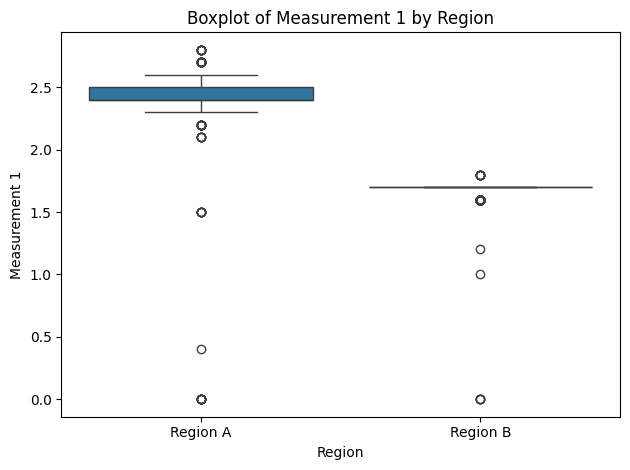

In [ ]:
sns.boxplot(x='Region', y='Measurement_1', data=df)
plt.title('Boxplot of Measurement 1 by Region')
plt.xlabel('Region')
plt.ylabel('Measurement 1')
plt.tight_layout()
plt.show()

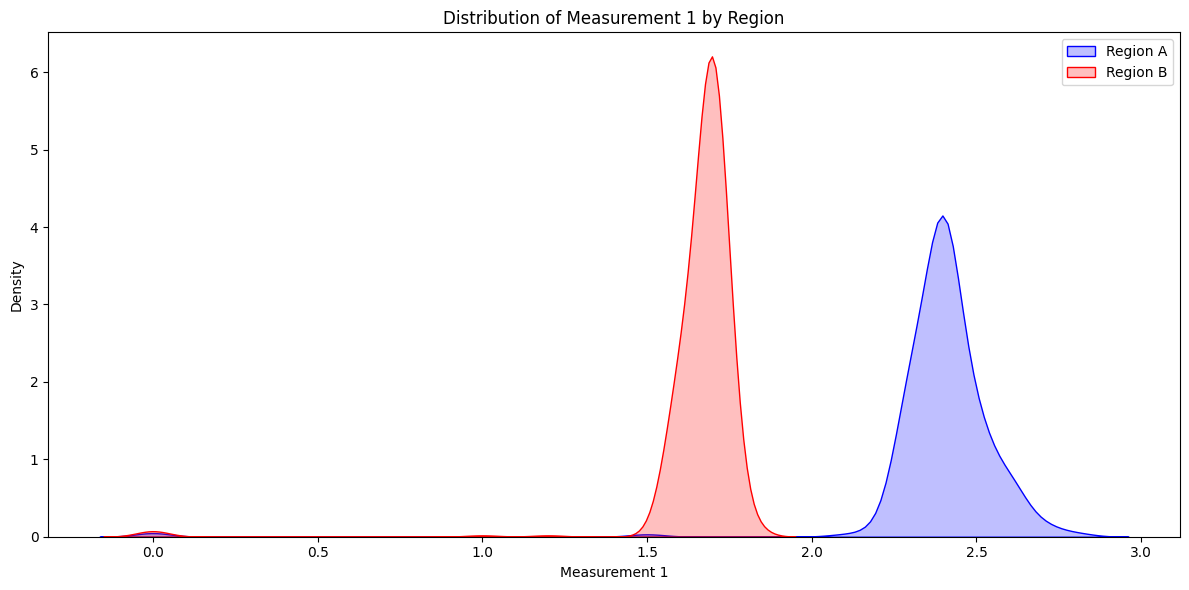

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Region'] == 'Region A']['Measurement_1'], label='Region A', fill=True, color='blue')
sns.kdeplot(data=df[df['Region'] == 'Region B']['Measurement_1'], label='Region B', fill=True, color='red')
plt.title('Distribution of Measurement 1 by Region')
plt.xlabel('Measurement 1')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

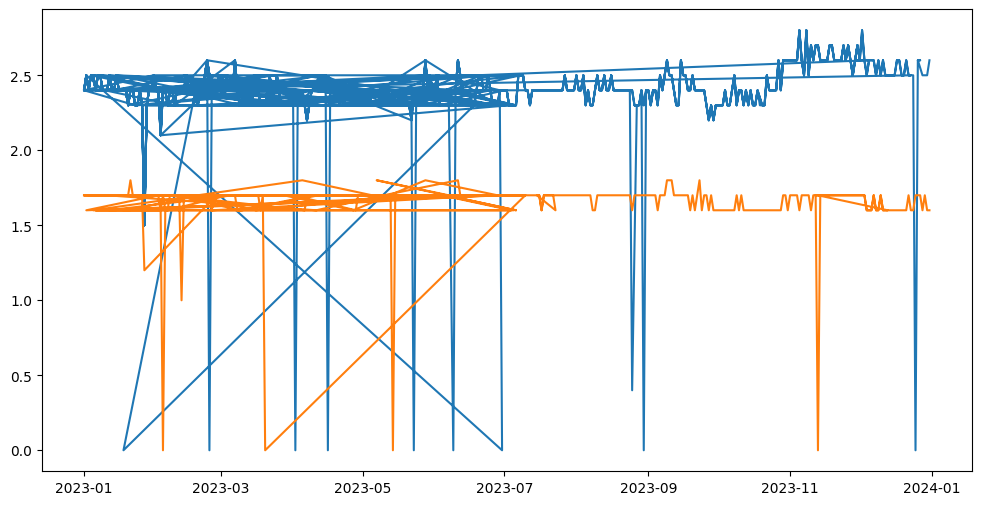

In [ ]:
plt.figure(figsize=(12, 6))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    plt.plot(region_data['Date'], region_data['Measurement_1'], label=f'{region} - Measurement 1')

In [ ]:
from scipy import stats
from sklearn.ensemble import IsolationForest

#measurement_columns = df.columns[2:]
measurement_columns = [col for col in df.columns[2:] if pd.api.types.is_numeric_dtype(df[col])]


#Z-score method for anomaly detection
z_scores = np.abs(stats.zscore(df[measurement_columns]))
outliers_zscore = (z_scores > 3)  # Z-score threshold is typically 3

# IQR method for anomaly detection
Q1 = df[measurement_columns].quantile(0.25)
Q3 = df[measurement_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[measurement_columns] < (Q1 - 1.5 * IQR)) | (df[measurement_columns] > (Q3 + 1.5 * IQR)))

# Isolation Forest method for anomaly detection
iso_forest = IsolationForest(contamination=0.05)  # 5% contamination (adjust as needed)
outliers_if = iso_forest.fit_predict(df[measurement_columns])
outliers_if = outliers_if == -1  # -1 indicates outliers

# Combine all detected outliers into a single DataFrame
outliers_combined = pd.DataFrame({
    'zscore_outliers': outliers_zscore.any(axis=1),
    'iqr_outliers': outliers_iqr.any(axis=1),
    'if_outliers': outliers_if
})

# Summary of anomalies detected by each method
outliers_summary = outliers_combined.sum()
print(outliers_summary)


zscore_outliers     40
iqr_outliers       629
if_outliers         93
dtype: int64


In [ ]:
df_imputed = df.copy()

for column in measurement_columns:
    df_imputed[column] = np.where(outliers_zscore[column], df[column].mean(), df[column])

df_imputed

,Region,Date,Measurement_1,Measurement_2,Measurement_3,Measurement_4,Measurement_5,Measurement_6,Measurement_7,Measurement_8,...,Measurement_40,Measurement_41,Measurement_42,Measurement_43,Measurement_44,Measurement_45,Measurement_46,Measurement_47,Measurement_48,Measurement_49
0,Region A,2023-01-01,2.4,2.4,2.4,2.3,2.2,2.2,2.2,2.2,...,2.4,2.4,2.5,2.5,2.5,2.5,2.6,2.6,2.5,2023-01-01
1,Region B,2023-01-01,1.7,1.7,1.7,1.7,1.7,1.7,1.6,1.6,...,1.6,1.6,1.6,1.6,1.7,1.7,1.7,1.7,1.7,2023-01-01
2,Region A,2023-01-31,2.5,2.4,2.5,2.4,2.3,2.2,2.2,2.2,...,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5,2023-01-31
3,Region B,2023-01-31,1.7,1.7,1.6,1.6,1.6,1.6,1.6,1.6,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7,2023-01-31
4,Region B,2023-02-01,1.7,1.7,1.6,1.7,1.6,1.6,1.6,1.6,...,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7,1.7,2023-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,Region A,2023-12-29,2.5,2.4,2.4,2.5,2.4,2.2,2.2,2.2,...,2.6,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.6,2023-12-29
1859,Region A,2023-12-30,2.5,2.4,2.4,2.4,2.3,2.3,2.3,2.2,...,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.6,2.6,2023-12-30
1860,Region A,2023-12-31,2.6,2.5,2.5,2.5,2.3,2.3,2.3,2.2,...,2.6,2.7,2.7,2.6,2.7,2.8,2.7,2.6,2.6,2023-12-31
1861,Region B,2023-12-30,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,...,1.8,1.8,1.7,1.7,1.7,1.7,1.7,1.7,1.6,2023-12-30


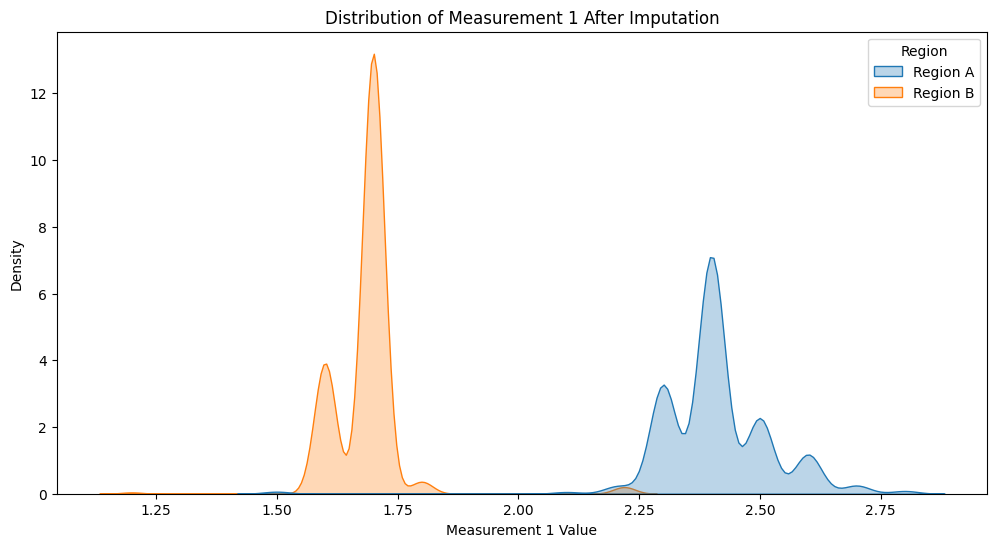

In [ ]:
#Vis after anomaly
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_imputed, x=measurement_columns[0], hue='Region', common_norm=False, fill=True, alpha=0.3)
plt.title('Distribution of Measurement 1 After Imputation')
plt.xlabel('Measurement 1 Value')
plt.ylabel('Density')
plt.show()

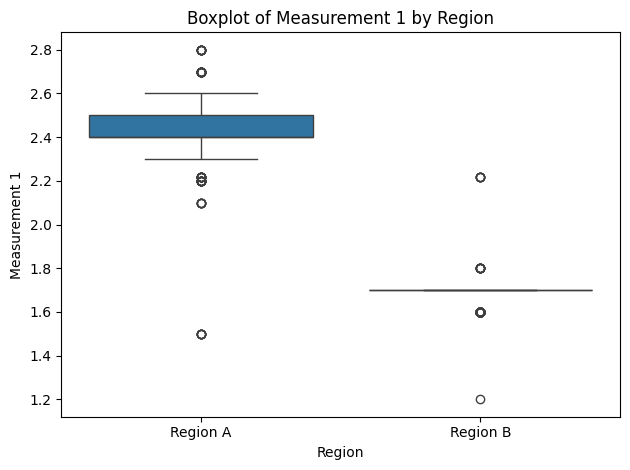

In [ ]:
sns.boxplot(x='Region', y='Measurement_1', data=df_imputed)
plt.title('Boxplot of Measurement 1 by Region')
plt.xlabel('Region')
plt.ylabel('Measurement 1')
plt.tight_layout()
plt.show()

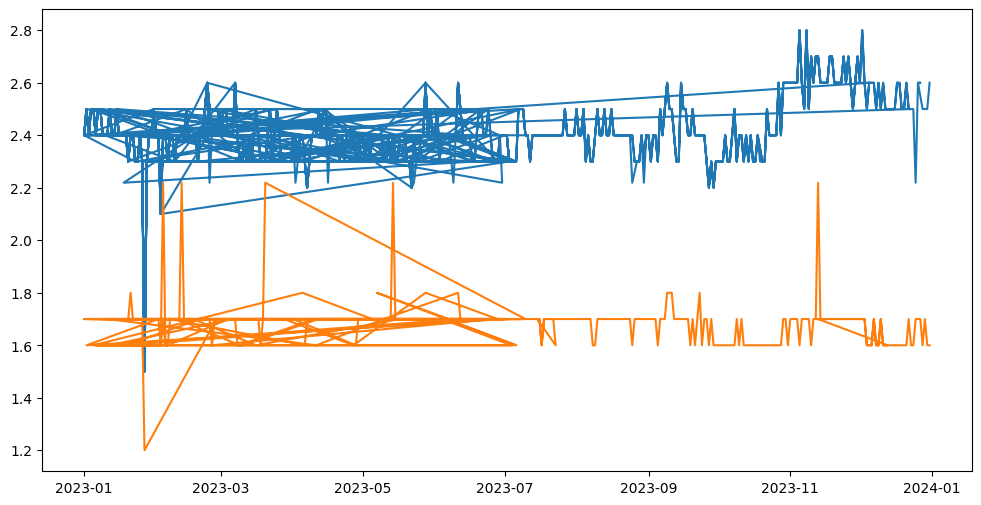

In [ ]:
plt.figure(figsize=(12, 6))
for region in df_imputed['Region'].unique():
    region_data = df_imputed[df_imputed['Region'] == region]
    plt.plot(region_data['Date'], region_data['Measurement_1'], label=f'{region} - Measurement 1')

In [ ]:
Q1 = df.iloc[:, 2:].quantile(0.25)
Q3 = df.iloc[:, 2:].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 2:] > (Q3 + 1.5 * IQR))).sum()

print(f"Number of outliers in each measurement column:\n{outliers}")

Number of outliers in each measurement column:
Measurement_1     491
Measurement_2     468
Measurement_3     455
Measurement_4     498
Measurement_5     455
Measurement_6     501
Measurement_7     471
Measurement_8     466
Measurement_9     466
Measurement_10    474
Measurement_11    448
Measurement_12    448
Measurement_13    203
Measurement_14     12
Measurement_15     16
Measurement_16     16
Measurement_17     19
Measurement_18     17
Measurement_19     18
Measurement_20     16
Measurement_21    198
Measurement_22    195
Measurement_23     23
Measurement_24    449
Measurement_25     19
Measurement_26    448
Measurement_27    445
Measurement_28    456
Measurement_29    455
Measurement_30    454
Measurement_31    455
Measurement_32    454
Measurement_33    456
Measurement_34    455
Measurement_35    466
Measurement_36    467
Measurement_37    458
Measurement_38    462
Measurement_39    459
Measurement_40    454
Measurement_41    454
Measurement_42    453
Measurement_43    454
Measure

In [ ]:
for column in df.columns[2:]:
    median_value = df[column].median()
    df[column] = df[column].mask(((df[column] < (Q1[column] - 1.5 * IQR[column])) | (df[column] > (Q3[column] + 1.5 * IQR[column]))), median_value)


df.head()

,Region,Date,Measurement_1,Measurement_2,Measurement_3,Measurement_4,Measurement_5,Measurement_6,Measurement_7,Measurement_8,...,Measurement_39,Measurement_40,Measurement_41,Measurement_42,Measurement_43,Measurement_44,Measurement_45,Measurement_46,Measurement_47,Measurement_48
0,Region A,2023-01-01,2.4,2.4,2.4,2.3,2.2,2.2,2.2,2.2,...,2.5,2.4,2.4,2.5,2.5,2.5,2.5,2.6,2.6,2.5
1,Region B,2023-01-01,2.4,2.3,2.3,2.3,2.2,2.2,2.2,2.2,...,2.6,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.4,2.4
2,Region A,2023-01-31,2.5,2.4,2.5,2.4,2.3,2.2,2.2,2.2,...,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5
3,Region B,2023-01-31,2.4,2.3,2.3,2.3,2.2,2.2,2.2,2.2,...,2.6,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.4,2.4
4,Region B,2023-02-01,2.4,2.3,2.3,2.3,2.2,2.2,2.2,2.2,...,2.6,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.4,2.4
